In [1]:
import requests
import time as t
from mpl_toolkits.basemap import Basemap
from shapely.geometry import LineString
from matplotlib import pyplot as plt
import numpy as np
import os
import urllib
import json
%matplotlib inline

# Env vars and functions

In [2]:
inv = 1.0 / 1e6

def decode(encoded):
    decoded = []
    previous = [0,0]
    i = 0
    while i < len(encoded):
        ll = [0,0]
        for j in [0, 1]:
            shift = 0
            byte = 0x20
            while byte >= 0x20:
                byte = ord(encoded[i]) - 63
                i += 1
                ll[j] |= (byte & 0x1f) << shift
                shift += 5
            ll[j] = previous[j] + (~(ll[j] >> 1) if ll[j] & 1 else (ll[j] >> 1))
            previous[j] = ll[j]
        decoded.append([float('%.6f' % (ll[1] * inv)), float('%.6f' % (ll[0] * inv))])
    return decoded

# Visualizing Valhalla Routes 

### Call Routing API

In [244]:
baseUrl = 'https://valhalla.mapzen.com/route'
apiKey = os.environ.get('MAPZEN_API')
jsonDict = '''{"locations":[{"lat":41.8758,"lon":-87.6189,"street":"Appleton"}, \
    {"lat":33.8128,"lon":-117.9259,"street":"Ranch Trail"}], \
    "costing":"auto","costing_options":{"auto":{"country_crossing_penalty":2000.0}}, \
    "directions_options":{"units":"miles"},"id":"my_work_route"}'''
payload = {"json": jsonDict, "apiKey": apiKey}
r = requests.get(baseUrl, params=payload)
shape = r.json()['trip']['legs'][0]['shape']
inv = 1.0 / 1e6

In [245]:
polyLine = decode(shape)
line = LineString(polyLine)

### Vizualize Route

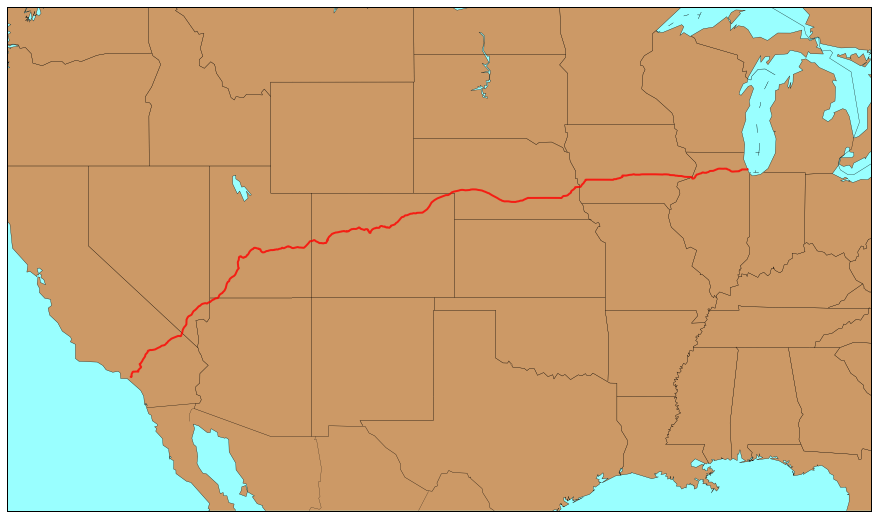

In [246]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
x, y = line.xy
minx, miny, maxx, maxy = np.min(x), np.min(y), np.max(x), np.max(y)
w, h = maxx - minx, maxy - miny
m = Basemap(
    projection='merc',
    ellps = 'WGS84',
    llcrnrlon=minx - 0.2 * w,
    llcrnrlat=miny - 0.7 * h,
    urcrnrlon=maxx + 0.2 * w,
    urcrnrlat=maxy + 0.7 * h,
    resolution='l')
m.drawcoastlines(linewidth=0.3)
m.drawmapboundary(linewidth=1,fill_color='#99ffff')
m.drawcountries(linewidth=0.3)
m.drawstates(linewidth=0.2)
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.plot(x, y, alpha=0.8, linewidth=2, solid_capstyle='round', color='r', latlon=True)
plt.show()

### Valhalla Route Object Attributes

In [6]:
r.json()['id']

u'my_work_route'

In [7]:
r.json()['trip'].keys()

[u'status',
 u'language',
 u'locations',
 u'summary',
 u'units',
 u'legs',
 u'status_message']

In [8]:
locs = r.json()['trip']['locations']
locs

[{u'lat': 41.875801,
  u'lon': -87.618896,
  u'side_of_street': u'right',
  u'street': u'Appleton',
  u'type': u'break'},
 {u'lat': 33.812801,
  u'lon': -117.925903,
  u'street': u'Ranch Trail',
  u'type': u'break'}]

In [9]:
summary = r.json()['trip']['summary']
summary

{u'length': 2013.888,
 u'max_lat': 41.905651,
 u'max_lon': -87.61731,
 u'min_lat': 33.812626,
 u'min_lon': -117.927185,
 u'time': 103206}

In [10]:
maneuvers = r.json()['trip']['legs'][0]['maneuvers']
maneuvers

[{u'begin_shape_index': 0,
  u'end_shape_index': 6,
  u'instruction': u'Drive south on US 41 South/South Lake Shore Drive.',
  u'length': 0.181,
  u'street_names': [u'US 41 South', u'South Lake Shore Drive'],
  u'time': 13,
  u'travel_mode': u'drive',
  u'travel_type': u'car',
  u'type': 2,
  u'verbal_pre_transition_instruction': u'Drive south on U.S. 41 South, South Lake Shore Drive for 2 tenths of a mile.'},
 {u'begin_shape_index': 6,
  u'end_shape_index': 11,
  u'instruction': u'Turn right onto East Balbo Drive.',
  u'length': 0.168,
  u'street_names': [u'East Balbo Drive'],
  u'time': 17,
  u'travel_mode': u'drive',
  u'travel_type': u'car',
  u'type': 10,
  u'verbal_post_transition_instruction': u'Continue for 2 tenths of a mile.',
  u'verbal_pre_transition_instruction': u'Turn right onto East Balbo Drive.',
  u'verbal_transition_alert_instruction': u'Turn right onto East Balbo Drive.'},
 {u'begin_shape_index': 11,
  u'end_shape_index': 18,
  u'instruction': u'Turn right onto Sout

In [11]:
shape = r.json()['trip']['legs'][0]['shape']
shape

u'}v{znAttvbfD~DOxL?x`A{@zK?zt@m@nI??nITfaAVxkADdd@?zKqGm@gN?my@l@k`@LuNNiRNcGLqBjAmAzBcAdDe@jB]tEO`GNfbAF~I?fl@?xBj@~IlFfw@F~Hd@ns@\\ls@d@ju@FlILhb@MfbA?`GFxW?fDLzVF|^Fl^Fja@DdEFzU?xBFbp@?fDFdYOvc@Ung@e@xa@LvYFhWd@h~B?bPt@lsA?nHF~fAFfc@Tz`@FvM\\xa@NdZFtZGpQWtP?\\e@bQm@pQiBxl@m@|Se@pROxMMhMFhLTxl@Nls@Tro@?`HVvc@d@dc@DrQ?lTEzVGpQe@tZm@tc@eAhl@UpRe@lTu@nSkAnS{A|TiB|TuExk@sApRu@dPe@rPUjV?xVFvYTvl@d@nqAl@lrAF~SvCjoEjGh}LLhk@xBboKV|r@nCbkNvDfcIOdjCjAneCrBx`AbF`eA|Ero@f]t~E~SpmClE~g@fD`q@z@n]dAde@Th`AzAtaKhGpaOfDhuJt@jsAt@l}@xBxl@fInr@hRl}@tO`g@di@twApLre@bLvm@zFfm@pBl^t@tn@dEruNGl}@^byAjAhhDzA~uFnC|bEvDryA`GvkAjGdcAnHjtA`Czt@?f`BeEd`DcKrrGgIhrDkBhv@ol@b~N_Ex`AyB~|@UppAWrZ{@r[yMdjD{ZjdF}Edx@wq@bkN_EtvAwC|rAN|i@xAxu@nDty@~Ctc@zFpg@fNvaAxWvuAl_@~fBnNxjA|ItlAtEpzAxB|mEV|~@LpQl@vaAd@tYd@bQzAj`@l@|JjAlTrFtn@pHhaAjFpq@nC~fArAvjBlA`vEjAtvBxLbrPxGb{HUdcAaCliAgDdx@}Dlt@_@dd@Vdn@GdZdE~vEdJdjMt@peAFnI\\ha@tE~mEfDtw@nN|gBjU|fBfJbyAvCdvBnDxrDr@|r@yAx`AeA`]aBl^}Ebp@aCha@qLhaAiXdxAkUz~@mZfx@_c@nfAcGdPsEhLa

# Open Traffic Reporter Validation Service 

### 1. Get New Route

#### from mapzen.com 

In [3]:
baseUrl = 'https://valhalla.mapzen.com/route'
apiKey = os.environ.get('MAPZEN_API')
jsonDict = '''{"locations":[{"lat":37.8261,"lon":-122.25872,"street":"38th"}, \
    {"lat":37.790168,"lon":-122.402264,"street":"New Montgomery"}], \
    "costing":"auto","costing_options":{"auto":{"country_crossing_penalty":2000.0}}, 
    "directions_options":{"units":"miles"},"id":"my_work_route"}'''
payload = {"json": jsonDict, "apiKey": apiKey}
route = requests.get(baseUrl, params=payload)
shape = route.json()['trip']['legs'][0]['shape']
inv = 1.0 / 1e6

#### from local valhalla server (via docker)

In [75]:
# baseUrl = 'localhost:8002/route'
# jsonDict = '''{"locations":[{"lat":37.8261,"lon":-122.25872,"street":"38th"}, \
#     {"lat":37.790168,"lon":-122.402264,"street":"New Montgomery"}], \
#     "costing":"auto","costing_options":{"auto":{"country_crossing_penalty":2000.0}}, 
#     "directions_options":{"units":"miles"},"id":"my_work_route"}'''
# payload = {"json": jsonDict}
# route = requests.get(baseUrl, params=payload)

### Map Matching API 

In [4]:
baseUrl = 'https://valhalla.mapzen.com/trace_attributes?'
apiKey = os.environ.get('MAPZEN_API')
url = baseUrl + 'api_key=' + apiKey
payload = {
    "encoded_polyline": shape,
    "costing": "pedestrian",
    "directions_options": {
        "units": "miles"
    },
    "shape_match": "map_snap",
    "trace_options": {
        "turn_penalty_factor": 500
    }
}
matched = requests.post(url, json=payload)

In [19]:
matched.json().keys()

[u'matched_points', u'shape', u'admins', u'edges', u'units', u'osm_changeset']

In [23]:
print 'Matched {0} points. Showing the first below:'.format(len(matched.json()['matched_points']))
print matched.json()['matched_points'][0]

Matched 313 points. Showing the first below:
{u'lon': -122.258926, u'distance_from_trace_point': 0.0, u'distance_along_edge': 0.119, u'type': u'matched', u'lat': 37.82618, u'edge_index': 0}


In [22]:
edges = matched.json()['edges']
print 'Got {0} edges. Showing the first below:'.format(len(edges))
edges[0]

Got 153 edges. Showing the first below:


{u'begin_heading': 171,
 u'begin_shape_index': 309,
 u'bicycle_network': 0,
 u'density': 12,
 u'drive_on_right': True,
 u'end_heading': 171,
 u'end_node': {u'admin_index': 0, u'elapsed_time': 6986},
 u'end_shape_index': 310,
 u'id': 3574016792480,
 u'lane_count': 4,
 u'length': 0.056,
 u'max_downward_grade': 0,
 u'max_upward_grade': 2,
 u'mean_elevation': 32,
 u'names': [u'Montgomery Street'],
 u'pedestrian_type': u'foot',
 u'road_class': u'primary',
 u'speed': 35,
 u'surface': u'paved_smooth',
 u'travel_mode': u'pedestrian',
 u'traversability': u'both',
 u'use': u'road',
 u'way_id': 287958607,
 u'weighted_grade': 1.667}

### Create Fake GPS traces

In [10]:
jsonDict = {"uuid":"100343", "trace":[]}
coords = decode(shape)
sttm = t.time() - 100000

#### Extract coords from routes.shape and save to map-matched json

In [24]:
for i, edge in enumerate(edges):
    dist = edge['length']
    speed = edge['speed']
    beginShapeIndex = edge['begin_shape_index']
    endShapeIndex = edge['end_shape_index']
    lon, lat = coords[endShapeIndex]
    dur = dist / speed * 3600.0
    time = sttm + dur
    intTime = int(round(time))
    if i == 0:
        st_lon, st_lat = coords[beginShapeIndex]
        jsonDict["trace"].append({"lat":st_lat,"lon":st_lon,"time":intTime})
    jsonDict["trace"].append({"lat": lat,"lon":lon,"time":intTime})
    sttm = time

In [32]:
print 'Sending {0} fake GPS measurements to the reporter'.format(len(jsonDict['trace']))

Sending 308 fake GPS measurements to the reporter


### Send Fake GPS to Reporter

In [33]:
baseUrl = 'http://localhost:8002/report'
payload = {"json": json.dumps(jsonDict)} 
report = requests.get(baseUrl, params=payload)

In [34]:
print report.status_code

200


In [44]:
segments = report.json()['segments']
print 'Reporter matched {0} GPS measurements to {1} OSMLR segments. Showing the first below: \n{2}'.format(
    len(jsonDict['trace']),len(segments), report.json()['segments'][0])

Reporter matched 308 GPS measurements to 28 OSMLR segments. Showing the first below: 
{u'segment_id': 205722588809, u'begin_shape_index': 0, u'start_time': -1.0, u'length': -1, u'end_time': 1495390030.61, u'end_shape_index': 1}


In [45]:
report.json()

{u'mode': u'auto',
 u'provider': u'',
 u'segments': [{u'begin_shape_index': 0,
   u'end_shape_index': 1,
   u'end_time': 1495390030.61,
   u'length': -1,
   u'segment_id': 205722588809,
   u'start_time': -1.0},
  {u'begin_shape_index': 1,
   u'end_shape_index': 5,
   u'end_time': 1495390063.0,
   u'length': 441,
   u'segment_id': 205655479945,
   u'start_time': 1495390030.61},
  {u'begin_shape_index': 5,
   u'end_shape_index': 14,
   u'end_time': 1495390086.0,
   u'length': 303,
   u'segment_id': 153310566025,
   u'start_time': 1495390063.0},
  {u'begin_shape_index': 15,
   u'end_shape_index': 19,
   u'end_time': 1495390113.0,
   u'length': 356,
   u'segment_id': 200991413897,
   u'start_time': 1495390087.0},
  {u'begin_shape_index': 19,
   u'end_shape_index': 19,
   u'end_time': -1.0,
   u'length': -1,
   u'segment_id': 135761598089,
   u'start_time': 1495390113.0},
  {u'begin_shape_index': 94,
   u'end_shape_index': 97,
   u'end_time': 1495391206.227,
   u'length': 427,
   u'segment_